<a href="https://colab.research.google.com/github/pillwood/Heart-Disease-Prediction/blob/Pre-ProcessingData/BigData_P201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 설치

In [3]:
install.packages("tidyverse")
library(tidyverse)
install.packages("data.table")
library(data.table)
install.packages("caret")
library(caret)

install.packages("psych")
library(psych)
install.packages("pastecs")
library(pastecs)

install.packages("ggthemes")
library(ggthemes)

install.packages("extrafont")
library(extrafont)

install.packages("GGally")
install.packages("PerformanceAnalytics")
install.packages("corrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Installing package into ‘/usr/local/lib/R/site-library’


In [56]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### Data : raw_merged_heart_dataset.csv

In [4]:
#https://drive.google.com/file/d/1mK4aKnRilDPq3TA71xFhCAzKVdTTLAJ2/view?usp=sharing
system("gdown --id 1mK4aKnRilDPq3TA71xFhCAzKVdTTLAJ2")
system("ls", TRUE)
TB <- fread("/content/raw_merged_heart_dataset.csv",header = T, encoding = "UTF-8") %>% as_tibble()
TB %>% show()

[1] "raw_merged_heart_dataset.csv" "sample_data"

# A tibble: 2,181 × 14
     age   sex    cp trestbps chol  fbs   restecg thalachh exang oldpeak slope
   <int> <int> <int> <chr>    <chr> <chr> <chr>   <chr>    <chr>   <dbl> <chr>
 1    63     1     3 145      233   1     0       150      0         2.3 0    
 2    37     1     2 130      250   0     1       187      0         3.5 0    
 3    41     0     1 130      204   0     0       172      0         1.4 2    
 4    56     1     1 120      236   0     1       178      0         0.8 2    
 5    57     0     0 120      354   0     1       163      1         0.6 2    
 6    57     1     0 140      192   0     1       148      0         0.4 1    
 7    56     0     1 140      294   0     0       153      0         1.3 1    
 8    44     1     1 120      263   0     1       173      0         0   2    
 9    52     1     2 172      199   1     1       162      0         0.5 2    
10    57     1     2 150      168   0     1       174      0         1.6 2    
# ℹ 2,171 more rows
# ℹ 3 mor

### 결측값 NA처리

In [14]:
TB_no_qm <- TB %>%
  mutate(across(everything(), ~ gsub("\\?", NA, as.character(.)))) %>%
  mutate(across(where(~ all(!is.na(as.numeric(.)))), as.numeric))

In [21]:
cat("NA포함 행수 : ", table(is.na(TB_no_qm)),"\n")

NA포함 행수 :  29752 782 


In [30]:
TB_no_qmna <- na.omit(TB_no_qm)

In [34]:
TB_no_qmna <- TB_no_qmna %>%
  mutate(across(everything(), ~ as.numeric(.)))

In [36]:
TB_no_qmna %>% show()

# A tibble: 1,888 × 14
     age   sex    cp trestbps  chol   fbs restecg thalachh exang oldpeak slope
   <dbl> <dbl> <dbl>    <dbl> <dbl> <dbl>   <dbl>    <dbl> <dbl>   <dbl> <dbl>
 1    63     1     3      145   233     1       0      150     0     2.3     0
 2    37     1     2      130   250     0       1      187     0     3.5     0
 3    41     0     1      130   204     0       0      172     0     1.4     2
 4    56     1     1      120   236     0       1      178     0     0.8     2
 5    57     0     0      120   354     0       1      163     1     0.6     2
 6    57     1     0      140   192     0       1      148     0     0.4     1
 7    56     0     1      140   294     0       0      153     0     1.3     1
 8    44     1     1      120   263     0       1      173     0     0       2
 9    52     1     2      172   199     1       1      162     0     0.5     2
10    57     1     2      150   168     0       1      174     0     1.6     2
# ℹ 1,878 more rows
# ℹ 3 mor

### 이상값 처리

In [17]:
handle_outliers_IQR <- function(df) {
  df %>%
    mutate(across(where(is.numeric), ~ {
      Q1 <- quantile(., 0.25, na.rm = TRUE)
      Q3 <- quantile(., 0.75, na.rm = TRUE)
      IQR <- Q3 - Q1
      lower_bound <- Q1 - 1.5 * IQR
      upper_bound <- Q3 + 1.5 * IQR
      ifelse(. < lower_bound | . > upper_bound, NA, .)
    }))
}

TB_IQR <- handle_outliers_IQR(TB_no_qm)

In [18]:
cat("NA포함 행수 : ", table(is.na(TB_IQR)),"\n")

NA포함 행수 :  29721 813 


In [20]:
na.omit(TB_IQR)

age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


### 상관관계 분석

In [51]:
#연속형만 선택.
TB_continuous <- TB_no_qmna %>%
  select(age, trestbps, chol, thalachh, oldpeak,target)

In [52]:
TB_cor <- TB_continuous %>% cor() %>% round(4)
TB_cor

,age,trestbps,chol,thalachh,oldpeak,target
age,1.0000,0.2716,0.2214,-0.3929,0.2054,-0.1623
trestbps,0.2716,1.0000,0.1370,-0.0412,0.1962,-0.0959
chol,0.2214,0.1370,1.0000,-0.0212,0.0581,-0.0716
thalachh,-0.3929,-0.0412,-0.0212,1.0000,-0.3496,0.2988
oldpeak,0.2054,0.1962,0.0581,-0.3496,1.0000,-0.3156
target,-0.1623,-0.0959,-0.0716,0.2988,-0.3156,1.0000


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


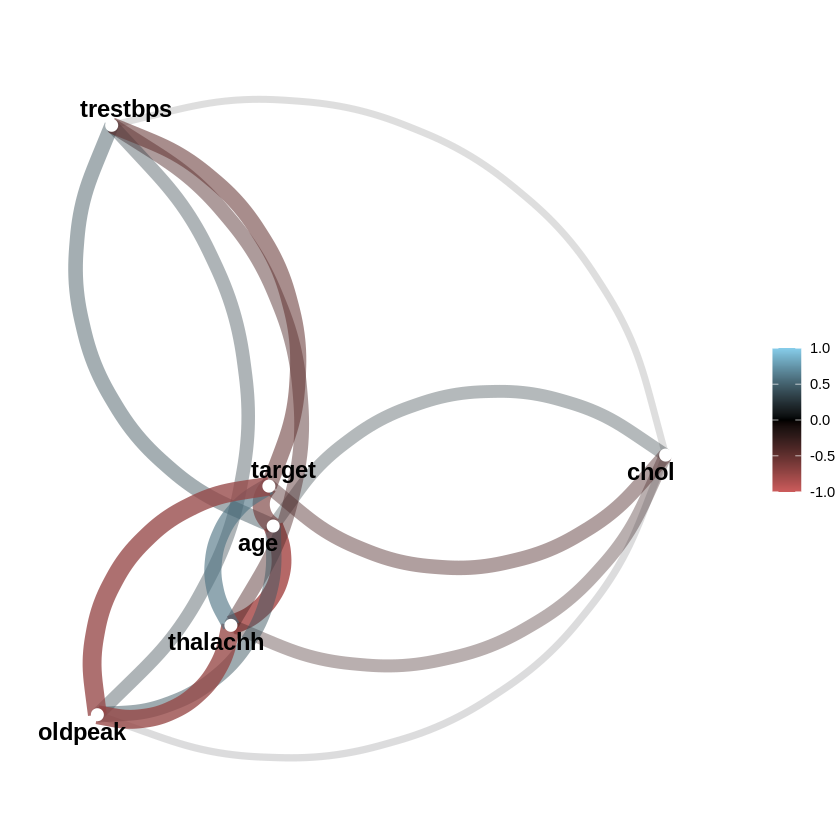

In [53]:
TB_cor %>%
  corrr::correlate() %>%
  corrr::network_plot(min_cor=0, colours=c("indianred", "black", "skyblue"))

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

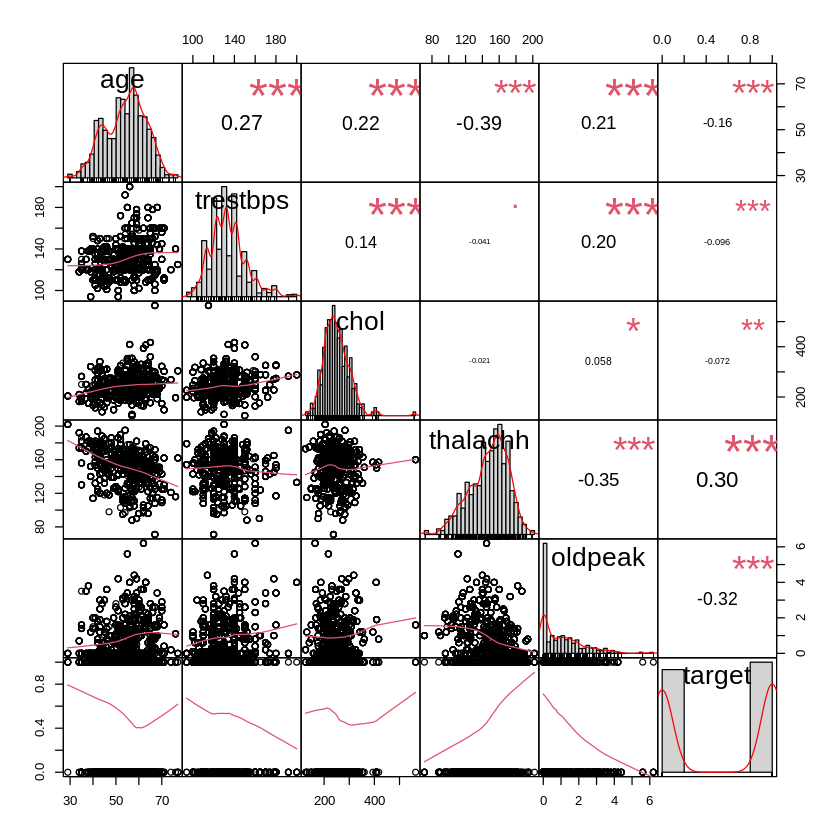

In [54]:
PerformanceAnalytics::chart.Correlation(TB_continuous,histogram = TRUE, pch = 19)

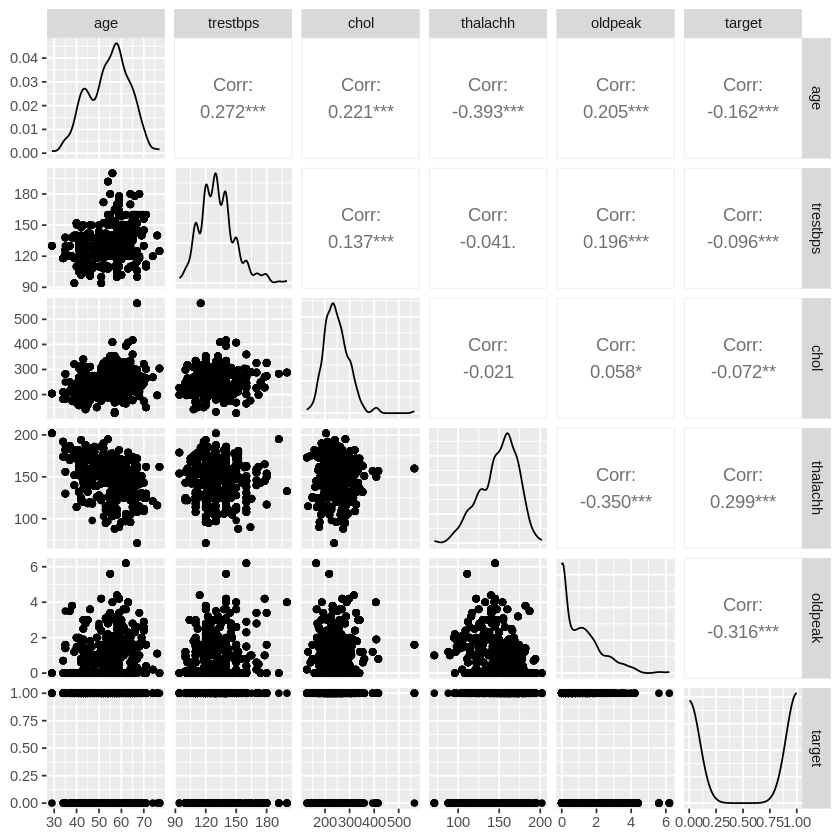

In [57]:
ggpairs(TB_continuous)

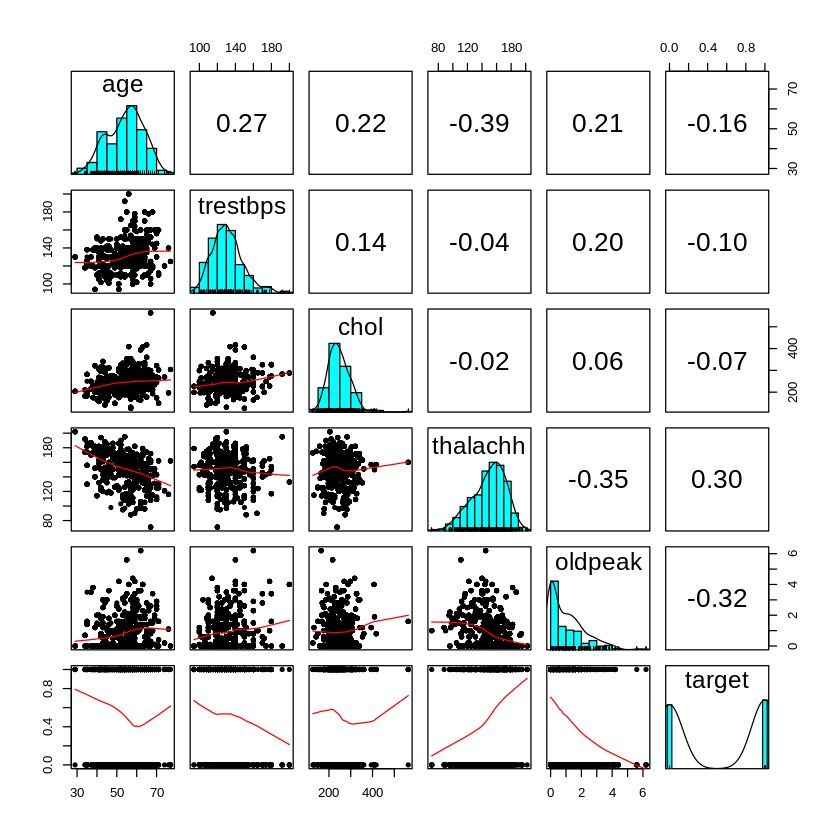

In [59]:
pairs.panels(TB_continuous, method = "pearson", density = TRUE, ellipses = FALSE)